# 回帰と分類

<img src="linear-vs-logistic.png" width="75%">

![linear vs logistic](https://github.com/microsoft/ML-For-Beginners/blob/main/2-Regression/4-Logistic/images/linear-vs-logistic.png)

image from [ML for Beginners](https://github.com/microsoft/ML-For-Beginners/tree/main/2-Regression/4-Logistic)

* 目的関数の違い：　
スケール変数とカテゴリー変数

* 線形回帰：
1変数、多変数

* ロジスティック回帰：

    * 二値（０か１か）： sigmoid関数

    * 多クラス（3種類以上のどれに近いか）: softmax関数、one-hot表現  

数値データなら深層学習でなくてもできる

アヤメデータを使う

* 特徴量：がく片、花びらの幅と長さ　４変数
* 目的変数：花の種類

<img src="https://miro.medium.com/max/1000/1*Hh53mOF4Xy4eORjLilKOwA.png" width="50%">

## seaborn ライブラリ　
統計用グラフが充実
* [seaborn](https://seaborn.pydata.org/index.html)

[グラフ一覧](https://seaborn.pydata.org/examples/index.html)

[matplotlib & seaborn](https://www.amazon.co.jp/dp/4798055433) これだけで本になるくらいなので使いこなすのは大変だが、そのまま出版に使えるような品質の高いグラフが作れる。関数名で検索すれば、用例を解説したページが多数ある。

In [21]:
# アヤメデータ
import seaborn as sns # なぜSNSと略すのかはアメリカのテレビ番組が由来なので説明されてもわからない
# from sklearn.datasets import load_iris # sklearn からデータを読むこともできる
print(sns.get_dataset_names()) # seabornに含まれるサンプルデータ
iris = sns.load_dataset('iris')
iris 

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


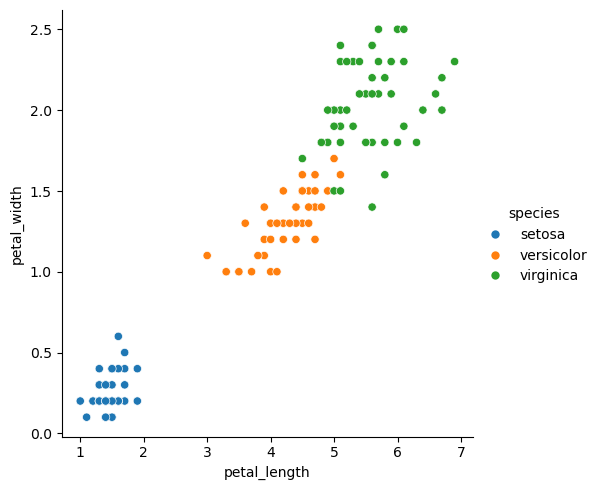

In [22]:
# sepal_length, sepal_widthで散布図、hue で層別に色分け
sns.relplot(data=iris, x='petal_length',y='petal_width', hue='species')

各特徴量のペア毎の散布図をまとめて描いたり、相関係数を視覚的に確認できる。

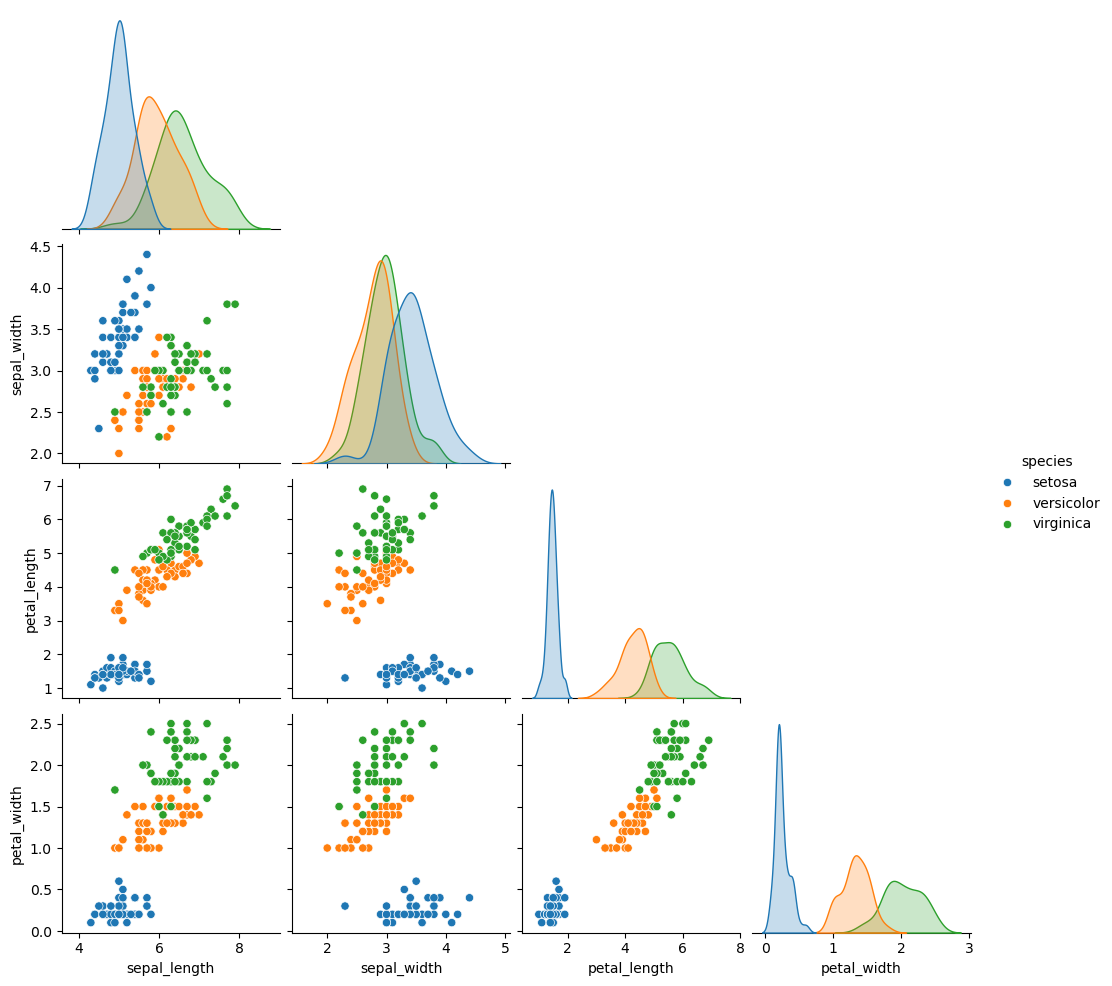

In [23]:
# 散布図行列　
sns.pairplot(iris, hue='species', corner=True)

In [24]:
# 相関行列
corr = iris.corr(numeric_only=True) #カテゴリー変数speciesを除く
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


<Axes: >

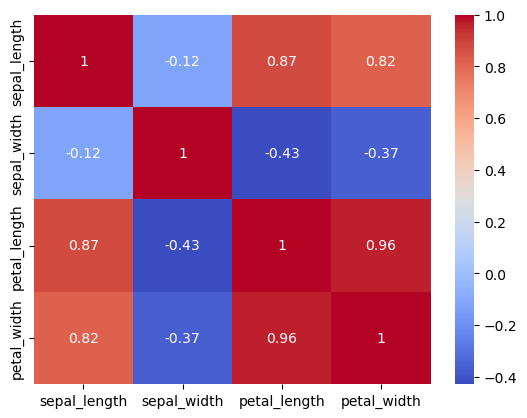

In [25]:
# 相関行列のヒートマップ
sns.heatmap(corr, cmap='coolwarm',annot=True)

## [pandas](https://pandas.pydata.org/)

Excelで扱うような表形式のデータを扱うライブラリ。
Panel Dataが由来であるが、タイトルにPython Data Analysis Libraryと表示される。

`import pandas as pd`
5文字を短縮して2文字で呼び出す

* Excel, CSVファイルをそのまま読み込める　`pd.read_excel()`, `pd.read_csv()`
* DataFrame形式（表形式） `df = pd.DataFrame()`
* 統計処理もできる（平均、ピボットテーブル）`df.groupby()`, `df.describe()`

## [scikit-learn](https://scikit-learn.org/stable/index.html) (sklearn)

データ分析に有用なライブラリ
* LinearRegression: 線形回帰
* LogisticRegression: ロジスティック回帰
* train_test_split: 

supervised learning(教師あり学習)

訓練用と検証用にデータを分割する

<img src='split.png' width='50%'>

訓練データで回帰式を求め、検証データでどれくらい再現できているかを検証する

* root_mean_squared_error, r2_score: 
結果の良し悪しを判断 (平均二乗平方根誤差、相関(決定係数))

* 線形回帰、ロジスティック回帰、その他の方法が全て同じ構文で統一されている。
```
model = モデル名() # モデルを指定
model.fit() # 学習
model.predict() # 予測
```


In [26]:
# 準備
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, root_mean_squared_error

# アヤメデータセットを読み込み
iris = sns.load_dataset('iris') #DataFrame形式で読み込み　
iris.head(5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [27]:
# setosa だけ抽出したいとき
#iris = iris[iris['species']=='setosa']
#print(iris)

In [28]:
# がく片の幅と長さのデータを抽出

X = iris[['petal_length']] # ベクトルではなく、行列形式
y = iris['petal_width']    # ベクトル

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.size, X_test.size, len(X)*0.3) # Xのサイズにtest_sizeを掛けた数が検証用データの個数

# 線形回帰モデルを作成
model = LinearRegression()

# モデルを訓練
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

print(list(y_pred))
print(list(y_test))

print('傾き:',model.coef_[0], 'y切片', model.intercept_)

105 45 45.0
[1.581887519841368, 0.3419958005528384, 2.491141447319623, 1.4992280718887994, 1.6232172438176522, 0.25933635260026977, 1.1272605561022404, 1.747206415746505, 1.4992280718887994, 1.2512497280310932, 1.747206415746505, 0.21800662862398545, 0.17667690464770114, 0.25933635260026977, 0.25933635260026977, 1.581887519841368, 2.036514483580495, 1.2512497280310932, 1.4992280718887994, 1.9538550356279267, 0.3006660765765541, 1.6645469677939366, 0.3006660765765541, 1.9538550356279267, 2.2844928274382013, 1.7885361397227895, 2.036514483580495, 2.07784420755678, 0.21800662862398545, 0.3006660765765541, 0.05268773271884819, 0.25933635260026977, 1.4578983479125152, 0.3006660765765541, 0.17667690464770114, 1.705876691770221, 1.4992280718887994, 0.25933635260026977, 0.21800662862398545, 0.25933635260026977, 1.747206415746505, 1.4992280718887994, 1.581887519841368, 0.17667690464770114, 0.25933635260026977]
[1.2, 0.3, 2.3, 1.5, 1.4, 0.4, 1.3, 2.3, 1.5, 1.2, 2.0, 0.1, 0.2, 0.1, 0.3, 1.6, 2.2,

Root Mean Squared Error: 0.18784422728496192
R^2 Score: 0.9445739521923764


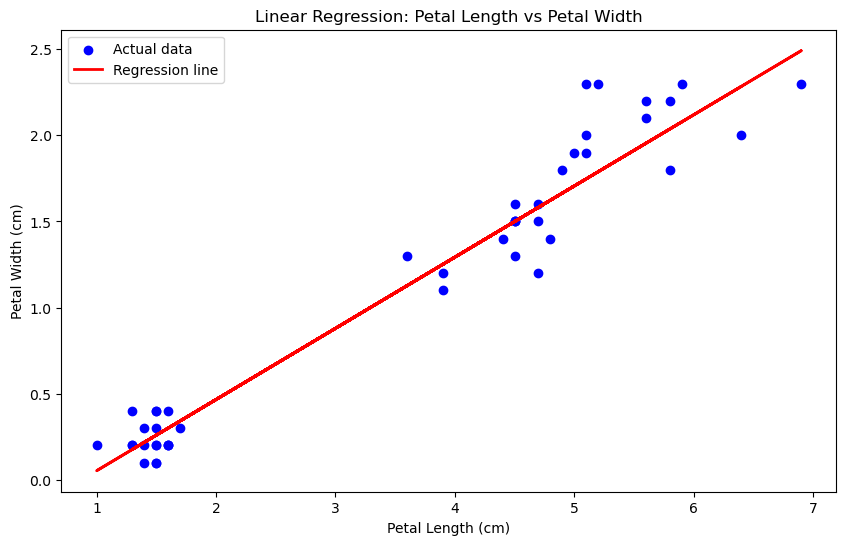

In [29]:
# モデルの評価
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {rmse}')
print(f'R^2 Score: {r2}')

# 回帰直線をプロット
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Linear Regression: Petal Length vs Petal Width')
plt.legend()
plt.show()

In [30]:
# 練習問題: LinearRegression を使って、sepal_length, sepal_width の回帰直線を求めよ (種毎に傾きが違うので全体の回帰直線にあまり意味がなさそう)


## ロジスティック回帰

* 目的変数が**2値**の分類（真偽）
* **多クラス分類**（アヤメでどの種に属するか）
各クラスの確率を求めて、最も高い確率のクラスに属すると予測

`sklearn.model_selection.train_test_split` データを訓練用(train)、検証用(test)に分割する。

ロジスティック回帰の性能評価（正しく予想できるかを定量的に判断する）

`sklearn.metrics.accuracy_score` 正解率

`sklearn.metrics.classification_report`　分類レポート

### 2値の例
アヤメの種がsetosaであるかどうかをロジスティック回帰で予測する

In [31]:
# 準備
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression # ロジスティック回帰
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # 2値分類なので平均二乗誤差を使わない

# アヤメデータセットを読み込み
iris = load_iris()
X = iris.data
y = iris.target
y
# y=0: setosa, y=1: versicolor, y=2: virginica
# それぞれの種が50個ずつ

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# setosa なら1、その他は0 
y_bin = (y==0).astype(int)
y_bin

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
X.size, y_bin.size

(600, 150)

In [47]:
# setosa かどうかを2値分類する
# 訓練データとテストデータに分割（順序をシャッフルし、乱数を固定するためにrandom_stateを指定）
X_train, X_test, y_train, y_test = train_test_split(X, y_bin, test_size=0.2, random_state=42)

# ロジスティック回帰モデルを作成
model = LogisticRegression()

# モデルを訓練
model.fit(X_train, y_train)

# テストデータで予測
y_pred = model.predict(X_test)

print('予測', list(y_pred))
print('正解', list(y_test))

print('正解率', accuracy_score(y_test, y_pred))

予測 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
正解 [0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1]
正解率 1.0


`test_size`, `random_state`の値を変えると結果が変わるかどうか試してみよ。

test_sizeを大きくすると学習データが減るので、正解率は下がるはずだが、setosaは孤立しているので、ほとんど変わらない。

random_stateは乱数の出方を変えるだけなので、データの選択によって偶然変わることがあるが、本質的には変わらないはず。

setosa以外の種について同様にやってみよ。

## 多クラス分類
アヤメがどの種に属するかを予測する

アヤメの種類を予測するロジスティック回帰モデルの精度: 0.97
分類レポート:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30

混同行列
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


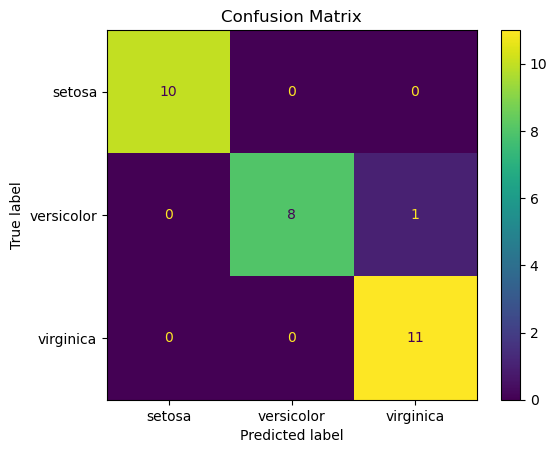

In [35]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix,ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier # 多クラス分類用

# Irisデータセットをロード
iris = load_iris()
X = iris.data
y = iris.target

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# OneVsRestClassifierを使用して多クラス分類のロジスティック回帰モデルを作成してトレーニング
model = OneVsRestClassifier(LogisticRegression(max_iter=100))
model.fit(X_train, y_train)

# テストセットで予測を行う
y_pred = model.predict(X_test)

# モデルの精度を計算
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
cm = confusion_matrix(y_test, y_pred)

print(f"アヤメの種類を予測するロジスティック回帰モデルの精度: {accuracy:.2f}")
print("分類レポート:")
print(report)

print('混同行列')
print(cm)

# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, display_labels=iris.target_names)
plt.title('Confusion Matrix')
plt.show()

### confusion matrix(混同行列)


| 実際　\　予測    | 陽性 | 陰性 |
|----|----|----|
|陽性 | TP   | FN   |
|陰性　| FP | TN |

* 正解率：全体の中で正しく分類できた割合
  
$$\mathrm{accuracy = \frac{TP+TN}{TP+TN+FP+FN}}$$

* 適合率（精度）：陽性と予測された中で実際に陽性だった割合 (陽性的中率)

$$\mathrm{precision = \frac{TP}{TP+FP}}$$

* 再現率：実際に陽性であるデータの中で正しく陽性と予測できた割合 (感度sensitivity)

$$\mathrm{recall = \frac{TP}{TP+FN}}$$

* F1スコア： 適合率と再現率の調和平均（バランスを取る。どちらかが極端に高い・低い場合に有用）

$$\mathrm{F1score = \frac{2\times precision \times recall}{precision + recall}}$$

# one-hot 表現
機械学習（深層学習）ではカテゴリー変数に対して
1 = [1,0,0]
2 = [0,1,0]
3 = [0,0,1]
のような変換を行う。
手書き数字の分類（0~9）は10列の[0,1]のデータを作る。
統計ソフトではダミー変数という。

# その他のデータセット
sklearn.datasets にはいくつかのサンプルデータが用意されている。

* [diabetes](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html)　糖尿病患者　回帰用
* [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) 乳癌診断結果　分類用

In [36]:
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_breast_cancer
import pandas as pd

diabetes = load_diabetes()
print(diabetes.DESCR)

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [37]:
cancer = load_breast_cancer()
print(cancer.DESCR)
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = cancer.target
df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# 統計用ライブラリ
* [statsmodels](https://www.statsmodels.org/stable/index.html) Rと似た形式にまとめられている。　
* [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html) `linregress`という線形回帰用の関数があるが、単回帰しか扱えない。
(`sklearn.linear_model.LinearRegression`は重回帰と単回帰を同じ方法で行う。)
統計検定用の関数が各種用意されている。

これらのライブラリは統計学的解析に使われる。情報が多過ぎるのでここでは紹介するにとどめる。